In [52]:
import os
import sys
import itertools as itt
from typing import List, Dict, Union, Tuple

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.colors import LogNorm

sys.path.insert(0, os.path.join("..", ".."))
sys.path.insert(1, os.path.join(".."))

from infobs.plots import Plotter
from pdr_util import latex_line, latex_param, Settings, PDRGetter

Settings.only_rotational = True

plt.rc("text", usetex=True)

%matplotlib inline

In [53]:
n_samples = 10_000_000
env = "horsehead"
obs_time = 0.75
seed = 0

In [54]:
bins = 200
n_samples = 1_000_000
# param = "Avmax"
restr = {"Avmax": [3, 6]} # TODO [12, 25]

In [55]:
log_scale = True

def plot_hist(
    line: str,
    getter: PDRGetter,
    param: str="Avmax"
):
    x, y = getter.get(
        [line] if isinstance(line, str) else line, [param],
        restrictions=restr, max_samples=n_samples
    )

    if x.shape[1] == 2:
        x = x[:, 0] / x[:, 1]

    x, y = x.flatten(), y.flatten()

    filt = x > 0
    x, y = x[filt], y[filt]
    x = np.log10(x)
    y = np.log10(y) # TODO

    vmax = None

    #

    # plt.figure(dpi=100)

    # plt.hist(x, bins=bins, density=True)
    # if log_scale:
    #     plt.yscale("log")

    # plt.xlabel("$"+latex_param(param)+"$")

    # plt.show()

    #

    plt.figure(dpi=100)

    if log_scale:
        plt.hist2d(y, x, bins=bins, norm=LogNorm(vmax=vmax), density=True)
    else:
        plt.hist2d(y, x, bins=bins, density=True, vmax=vmax)
    plt.colorbar()

    plt.xlabel("$"+latex_param(param)+"$")

    try:
        plt.ylabel("$"+latex_line(line)+"$")
    except:
        pass

    plt.show()

## Without noise nor kappa

In [56]:
kappa_bounds = (1, 1) #(1e-1, 1e1)
noise = False

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

                   P        radm      Avmax  kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771    1.0      2.611294e-11   
1       2.539102e+05  212.618871   2.582640    1.0      1.387177e-11   
2       1.152021e+05   75.546806   1.163756    1.0      5.459814e-13   
3       1.058745e+05  176.529241   4.174700    1.0      8.238023e-11   
4       1.659225e+06  203.547031  13.426715    1.0      1.359072e-09   
...              ...         ...        ...    ...               ...   
999995  1.695064e+06   14.282686   3.224658    1.0      3.473861e-10   
999996  4.050502e+05   30.683801   4.364480    1.0      3.054697e-10   
999997  1.582261e+05   87.433716  20.952226    1.0      3.815224e-09   
999998  2.278042e+05   44.411717   1.142852    1.0      3.390978e-12   
999999  5.369081e+05   11.652636   5.296886    1.0      5.662384e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0       2.175728e-11  4.387843e-11  1.499081e-10  1.831

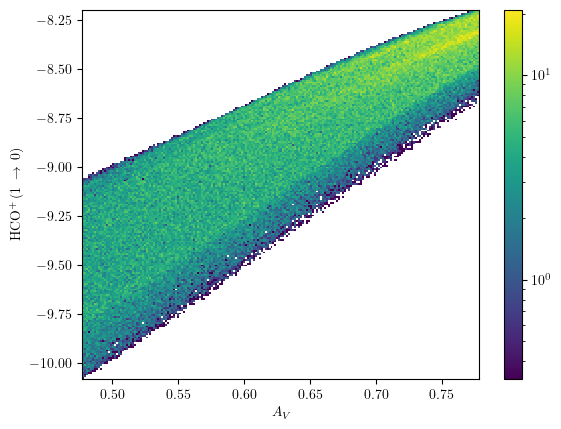

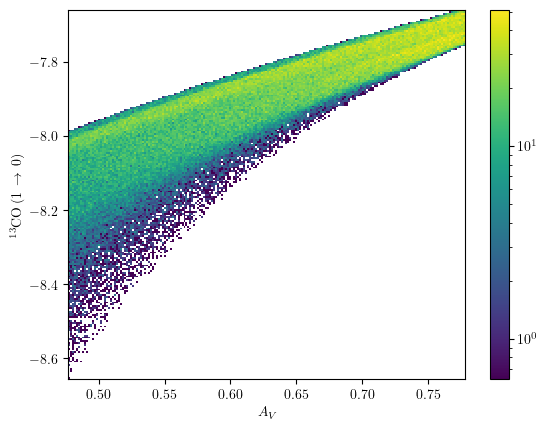

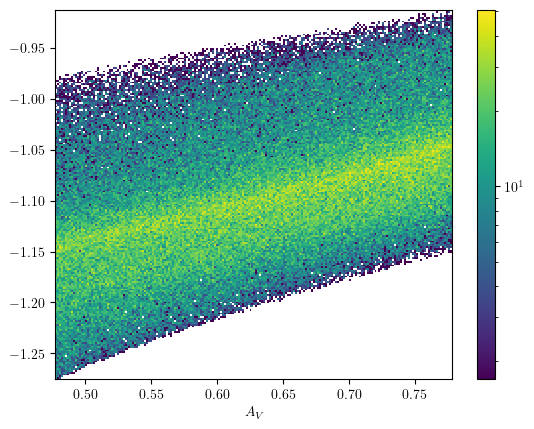

In [57]:
line = "hcop_j1__j0"
plot_hist(line, getter)

line = "13c_o_j1__j0" # "c_18o_j1__j0"
plot_hist(line, getter)

line = ["13c_o_j1__j0", "13c_o_j2__j1"]
plot_hist(line, getter)

## With noise but without kappa

In [58]:
kappa_bounds = (1, 1) #(1e-1, 1e1)
noise = True

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

                   P        radm      Avmax  kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771    1.0     -1.690415e-10   
1       2.539102e+05  212.618871   2.582640    1.0     -6.620505e-12   
2       1.152021e+05   75.546806   1.163756    1.0      4.140670e-11   
3       1.058745e+05  176.529241   4.174700    1.0     -2.059436e-10   
4       1.659225e+06  203.547031  13.426715    1.0      1.334677e-09   
...              ...         ...        ...    ...               ...   
999995  1.695064e+06   14.282686   3.224658    1.0     -1.019661e-10   
999996  4.050502e+05   30.683801   4.364480    1.0      4.277938e-10   
999997  1.582261e+05   87.433716  20.952226    1.0      3.718315e-09   
999998  2.278042e+05   44.411717   1.142852    1.0     -1.590146e-10   
999999  5.369081e+05   11.652636   5.296886    1.0      4.198123e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0      -1.679312e-10  9.604708e-11  6.167286e-11 -1.263

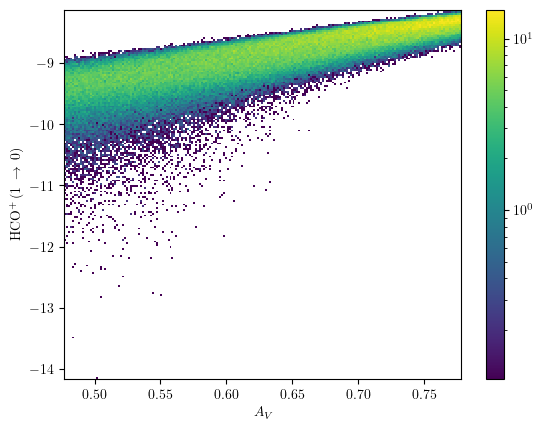

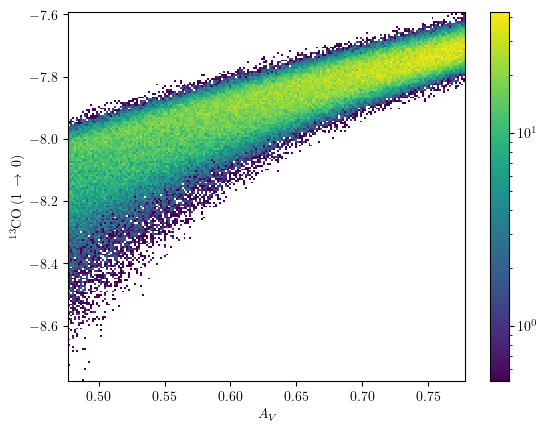

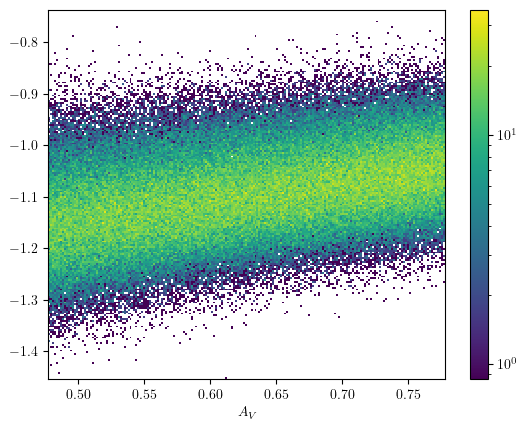

In [59]:
line = "hcop_j1__j0"
plot_hist(line, getter)

line = "13c_o_j1__j0"
plot_hist(line, getter)

line = ["13c_o_j1__j0", "13c_o_j2__j1"]
plot_hist(line, getter)

## With kappa but without noise

In [60]:
kappa_bounds = (1e-1, 1e1)
noise = False

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

                   P        radm      Avmax     kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771  0.326176      8.517427e-12   
1       2.539102e+05  212.618871   2.582640  1.450575      2.012204e-11   
2       1.152021e+05   75.546806   1.163756  1.740257      9.501482e-13   
3       1.058745e+05  176.529241   4.174700  0.152489      1.256205e-11   
4       1.659225e+06  203.547031  13.426715  0.147492      2.004520e-10   
...              ...         ...        ...       ...               ...   
999995  1.695064e+06   14.282686   3.224658  3.993619      1.387328e-09   
999996  4.050502e+05   30.683801   4.364480  0.372381      1.137513e-10   
999997  1.582261e+05   87.433716  20.952226  3.916403      1.494195e-08   
999998  2.278042e+05   44.411717   1.142852  0.307004      1.041045e-12   
999999  5.369081e+05   11.652636   5.296886  1.503407      8.512869e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0       7.096711e-1

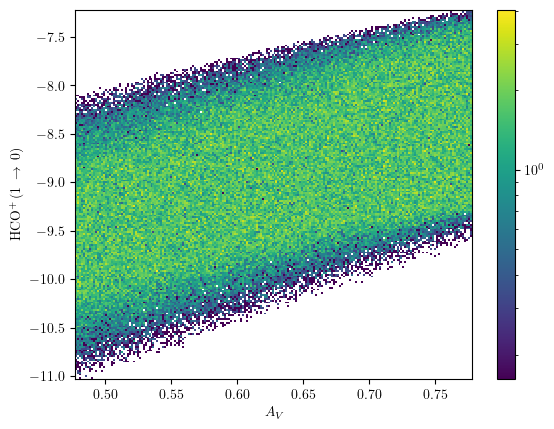

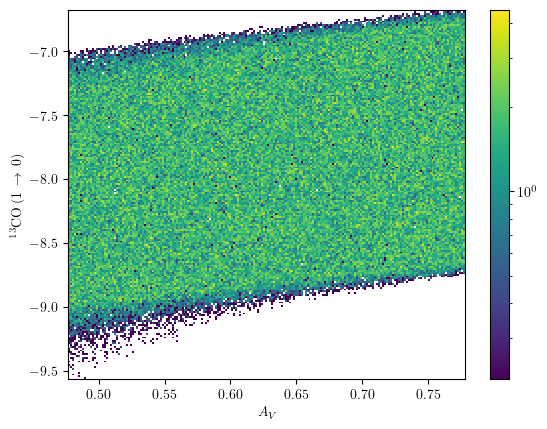

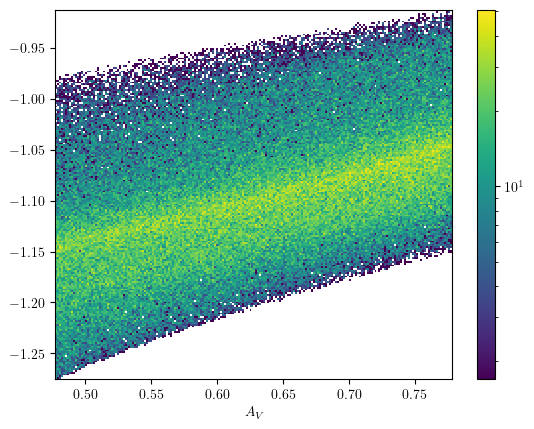

In [61]:
line = "hcop_j1__j0"
plot_hist(line, getter)

line = "13c_o_j1__j0"
plot_hist(line, getter)

line = ["13c_o_j1__j0", "13c_o_j2__j1"]
plot_hist(line, getter)

## With noise and kappa

In [62]:
kappa_bounds = (1e-1, 1e1)
noise = True

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

                   P        radm      Avmax     kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771  0.326176     -1.875419e-10   
1       2.539102e+05  212.618871   2.582640  1.450575     -3.817782e-13   
2       1.152021e+05   75.546806   1.163756  1.740257      4.179977e-11   
3       1.058745e+05  176.529241   4.174700  0.152489     -2.836250e-10   
4       1.659225e+06  203.547031  13.426715  0.147492      2.261279e-10   
...              ...         ...        ...       ...               ...   
999995  1.695064e+06   14.282686   3.224658  3.993619      1.011327e-09   
999996  4.050502e+05   30.683801   4.364480  0.372381      2.461940e-10   
999997  1.582261e+05   87.433716  20.952226  3.916403      1.409049e-08   
999998  2.278042e+05   44.411717   1.142852  0.307004     -1.613423e-10   
999999  5.369081e+05   11.652636   5.296886  1.503407      6.898663e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0      -1.819073e-1

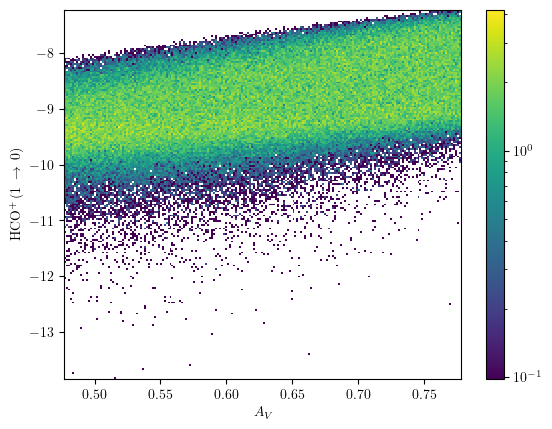

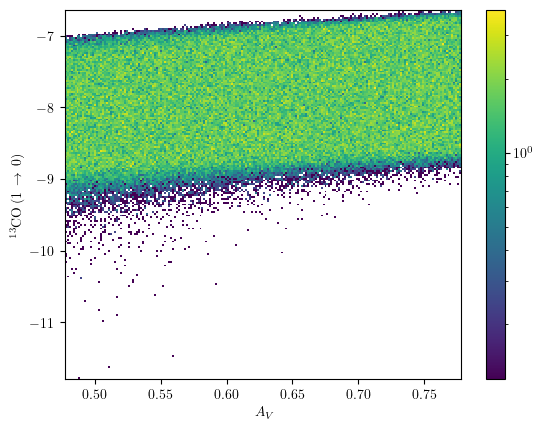

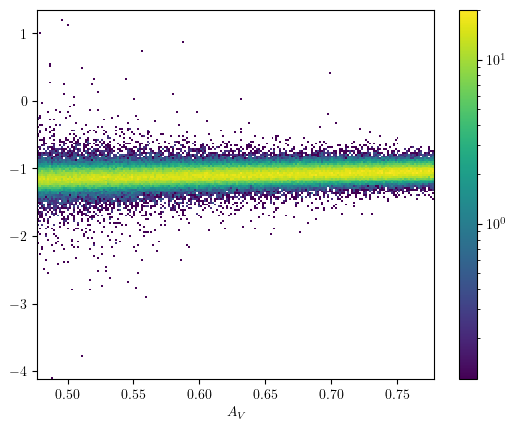

In [63]:
line = "hcop_j1__j0"
plot_hist(line, getter)

line = "13c_o_j1__j0"
plot_hist(line, getter)

line = ["13c_o_j1__j0", "13c_o_j2__j1"]
plot_hist(line, getter)

## Test

In [85]:
delta = 9
kappa_bounds = (1/(1+delta), 1+delta) #(1e-1, 1e1)
noise = True

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

                   P        radm      Avmax     kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771  0.326176     -1.875419e-10   
1       2.539102e+05  212.618871   2.582640  1.450575     -3.817782e-13   
2       1.152021e+05   75.546806   1.163756  1.740257      4.179977e-11   
3       1.058745e+05  176.529241   4.174700  0.152489     -2.836250e-10   
4       1.659225e+06  203.547031  13.426715  0.147492      2.261279e-10   
...              ...         ...        ...       ...               ...   
999995  1.695064e+06   14.282686   3.224658  3.993619      1.011327e-09   
999996  4.050502e+05   30.683801   4.364480  0.372381      2.461940e-10   
999997  1.582261e+05   87.433716  20.952226  3.916403      1.409049e-08   
999998  2.278042e+05   44.411717   1.142852  0.307004     -1.613423e-10   
999999  5.369081e+05   11.652636   5.296886  1.503407      6.898663e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0      -1.819073e-1

In [86]:
lines = ["hcop_j1__j0", "co_v0_j1__v0_j0"]
# lines = ["hcop_j1__j0", "hcop_j2__j1"]
# lines = ["13c_o_j1__j0", "co_v0_j1__v0_j0"]
# lines = ["13c_o_j1__j0", "c_18o_j1__j0"]
# lines = ["hcop_j4__j3", "c2h_n4d0_j4d5_f5d0__n3d0_j3d5_f4d0"]

X, Y = getter.get(
    lines,
    ["Avmax"],
    restrictions=restr
)

filt = np.all(X>0, axis=1)
X, Y = X[filt], Y[filt]
X = np.log10(X)

x, y = X[:, 0], X[:, 1]
z = Y[:, 0]

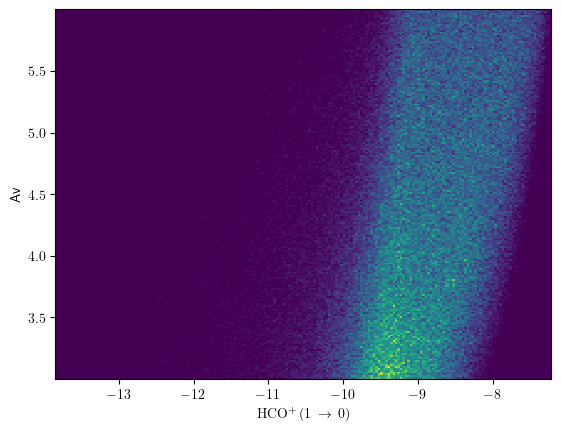

In [87]:
plt.figure()
plt.hist2d(x, z, bins=bins)
plt.xlabel("$"+latex_line(lines[0])+"$")
plt.ylabel("Av")
plt.show()

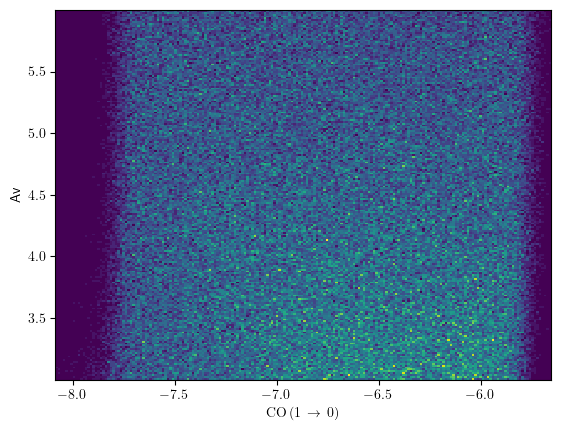

In [88]:
plt.figure()
plt.hist2d(y, z, bins=bins)
plt.xlabel("$"+latex_line(lines[1])+"$")
plt.ylabel("Av")
plt.show()

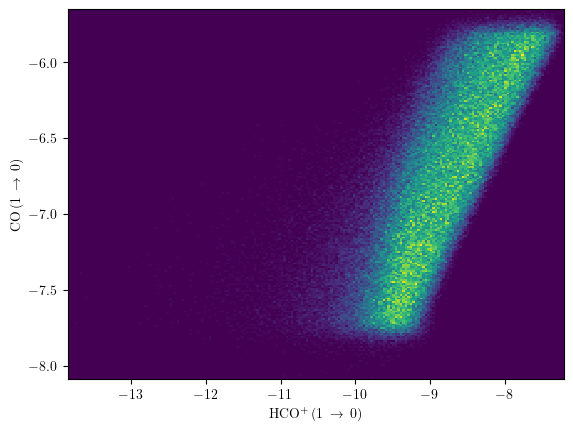

In [89]:
plt.figure()
plt.hist2d(x, y, bins=bins)
plt.xlabel("$"+latex_line(lines[0])+"$")
plt.ylabel("$"+latex_line(lines[1])+"$")
plt.show()

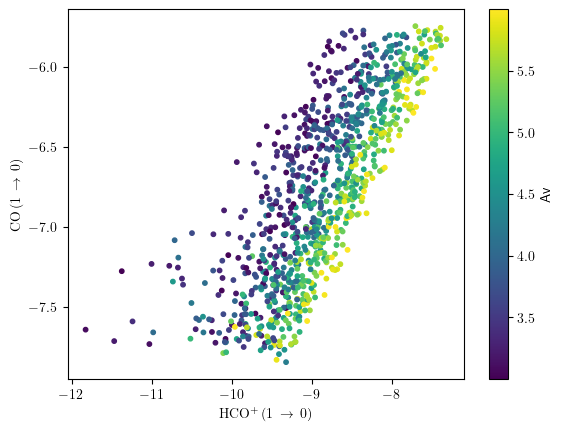

In [90]:
plt.figure()
plt.scatter(x[:1_000], y[:1_000], c=z[:1_000], s=10)
plt.xlabel("$"+latex_line(lines[0])+"$")
plt.ylabel("$"+latex_line(lines[1])+"$")
cbar = plt.colorbar()
cbar.set_label("Av")
plt.show()

__Question:__ Why HCO+ ?

## Link with kappa

In [91]:
kappa_bounds = (1, 1) #(1e-1, 1e1)
noise = False

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

# lines = ["co_v0_j1__v0_j0", "cn_n2_j1d5__n1_j0d5"]
lines = ["co_v0_j1__v0_j0", "hcop_j1__j0"]

X, Y = getter.get(
    lines, ["kappa"], #13c_o_j1__j0
    restrictions=restr, max_samples=100_000
)

X, Y = np.log10(X), np.log10(Y)
x, y = X[:, 0], X[:, 1]
z = Y[:, 0]

                   P        radm      Avmax  kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771    1.0      2.611294e-11   
1       2.539102e+05  212.618871   2.582640    1.0      1.387177e-11   
2       1.152021e+05   75.546806   1.163756    1.0      5.459814e-13   
3       1.058745e+05  176.529241   4.174700    1.0      8.238023e-11   
4       1.659225e+06  203.547031  13.426715    1.0      1.359072e-09   
...              ...         ...        ...    ...               ...   
999995  1.695064e+06   14.282686   3.224658    1.0      3.473861e-10   
999996  4.050502e+05   30.683801   4.364480    1.0      3.054697e-10   
999997  1.582261e+05   87.433716  20.952226    1.0      3.815224e-09   
999998  2.278042e+05   44.411717   1.142852    1.0      3.390978e-12   
999999  5.369081e+05   11.652636   5.296886    1.0      5.662384e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0       2.175728e-11  4.387843e-11  1.499081e-10  1.831

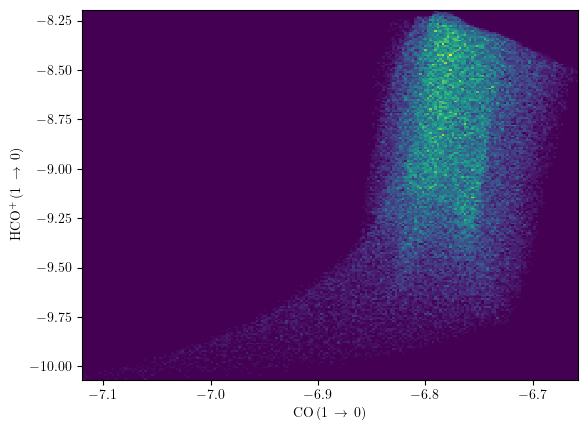

In [92]:
plt.figure()
plt.hist2d(x, y, bins=bins)
plt.xlabel("$"+latex_line(lines[0])+"$")
plt.ylabel("$"+latex_line(lines[1])+"$")
plt.show()

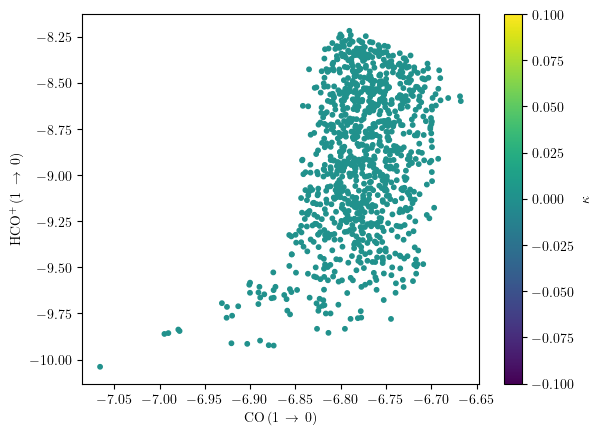

In [93]:
plt.figure()
plt.scatter(x[:1_000], y[:1_000], c=z[:1_000], s=10)
plt.xlabel("$"+latex_line(lines[0])+"$")
plt.ylabel("$"+latex_line(lines[1])+"$")
cbar = plt.colorbar()
cbar.set_label("$\\kappa$")
plt.show()

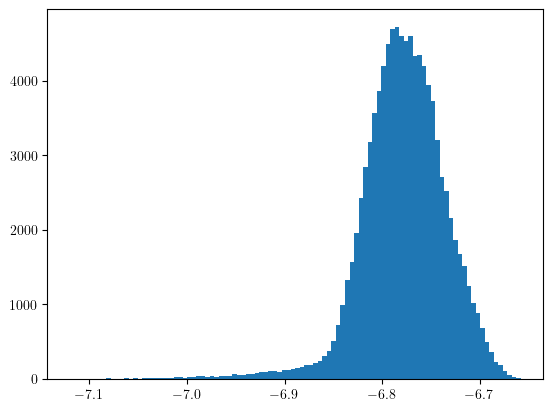

In [94]:
plt.hist(x, bins=100);

In [95]:
kappa_bounds = (1e-1, 1e1)
noise = True

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    kappa=kappa_bounds,
    seed=seed,
    noise=noise
)

                   P        radm      Avmax     kappa  hcn_j1_f2__j0_f1  \
0       9.024903e+05   44.075727   1.462771  0.326176     -1.875419e-10   
1       2.539102e+05  212.618871   2.582640  1.450575     -3.817782e-13   
2       1.152021e+05   75.546806   1.163756  1.740257      4.179977e-11   
3       1.058745e+05  176.529241   4.174700  0.152489     -2.836250e-10   
4       1.659225e+06  203.547031  13.426715  0.147492      2.261279e-10   
...              ...         ...        ...       ...               ...   
999995  1.695064e+06   14.282686   3.224658  3.993619      1.011327e-09   
999996  4.050502e+05   30.683801   4.364480  0.372381      2.461940e-10   
999997  1.582261e+05   87.433716  20.952226  3.916403      1.409049e-08   
999998  2.278042e+05   44.411717   1.142852  0.307004     -1.613423e-10   
999999  5.369081e+05   11.652636   5.296886  1.503407      6.898663e-10   

         hcop_j1__j0    hnc_j1__j0     cs_j2__j1  c_18o_j1__j0  13c_o_j1__j0  \
0      -1.819073e-1

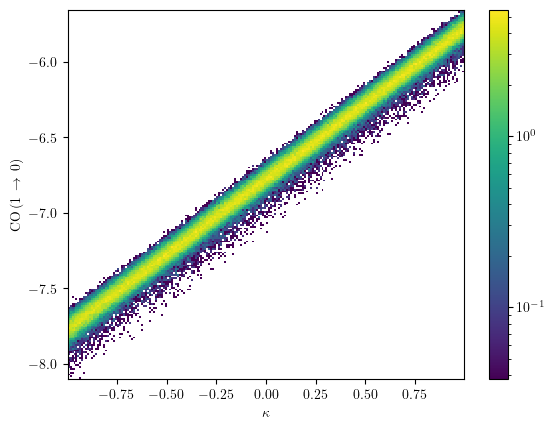

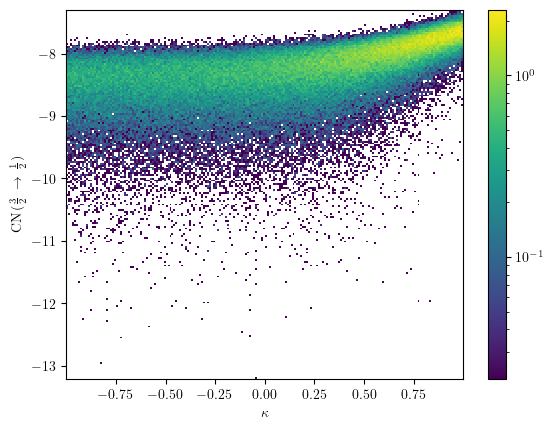

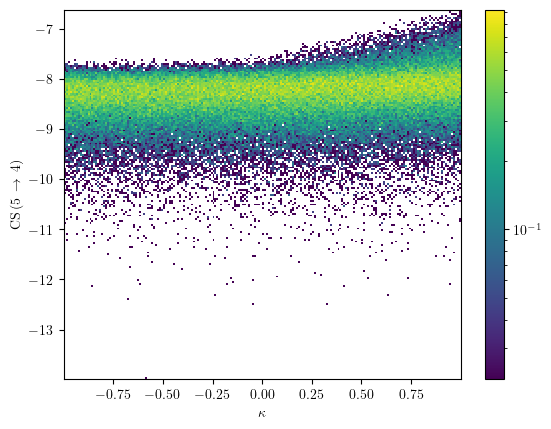

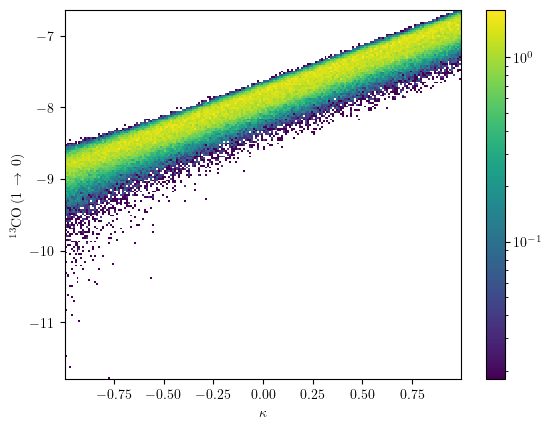

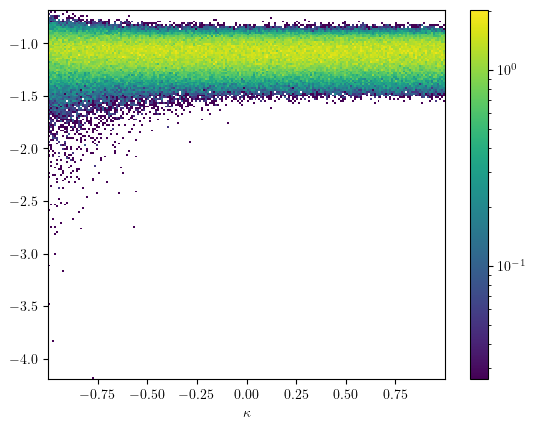

In [96]:
line = "co_v0_j1__v0_j0"
plot_hist(line, getter, param="kappa")

line = "cn_n2_j1d5__n1_j0d5"
plot_hist(line, getter, param="kappa")

line = "cs_j5__j4"
plot_hist(line, getter, param="kappa")

line = "13c_o_j1__j0"
plot_hist(line, getter, param="kappa")

line = ["13c_o_j1__j0", "co_v0_j1__v0_j0"]
plot_hist(line, getter, param="kappa")

## Modelization

In [97]:
_n_samples = 1_000

z = np.random.uniform(-1, 1, _n_samples)
x = z.copy()
y = z.copy()**2 # np.random.uniform(-1, 1, _n_samples)

offset = np.random.uniform(-5, 5, _n_samples)

x += offset
y += offset

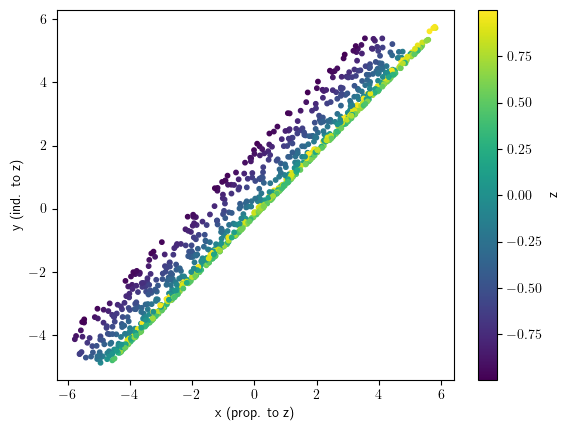

In [98]:
plt.figure()
plt.scatter(x[:1_000], y[:1_000], c=z[:1_000], s=10)
plt.xlabel("x (prop. to z)")
plt.ylabel("y (ind. to z)")
cbar = plt.colorbar()
cbar.set_label("z")
plt.show()